In [2]:
import pickle
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# fastText

In [3]:
import gensim
fastText = gensim.models.KeyedVectors.load_word2vec_format('fastText.vec', binary=False)

# AutoEncoder

In [4]:
from keras.models import load_model
from keras import backend as K

autoencoder = load_model('title_autoencoder.hdf5')

encoder = K.function([autoencoder.get_layer("encoded").input],
                     [autoencoder.get_layer("encoded").output])

decoder = K.function([autoencoder.get_layer("decoded").input],
                     [autoencoder.get_layer("decoded").output])

/root/.pyenv/versions/3.6.4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 画像パスのリスト生成

In [5]:
# 15秒くらい?
path_img_dirs = []
for i in range(10):
    path_img_dirs.append('data_image/image' + str(i))
print(path_img_dirs)

path = "../cookpad/"

path_imgs = []
for path_img_dir in path_img_dirs:
    path_imgs_part = os.listdir(path + path_img_dir)
    path_imgs_part = [path_img_dir + "/" + p for p in path_imgs_part]
    path_imgs.extend(path_imgs_part)

path_imgs = [path + p for p in path_imgs]

path_imgs.sort()
print(len(path_imgs))
print(path_imgs[0])
print(path_imgs[-1])

['data_image/image0', 'data_image/image1', 'data_image/image2', 'data_image/image3', 'data_image/image4', 'data_image/image5', 'data_image/image6', 'data_image/image7', 'data_image/image8', 'data_image/image9']
238381
../cookpad/data_image/image0/menu-0000000-0010000-0000001.png
../cookpad/data_image/image9/menu-0950000-0960000-0001913.png


In [6]:
path = "../food-life-management/"

path_title_V = os.listdir(path + 'recipe_title_V_autoencoder/')

path_title_V = [path + 'recipe_title_V_autoencoder/' + p for p in path_title_V]
path_title_V.sort()

title_V = {}

for path_t_V in path_title_V:
    with open(path_t_V, 'rb') as f:
        t_V = pickle.load(f)
    title_V.update(t_V)
n=0
for key, v in title_V.items():
    print(key)
    print(v.shape, end=" ")
    [[v]] = decoder([v.reshape(1,-1)])
    print(fastText.most_similar(positive=[v], topn=3))
    n+=1
    if n>7:
        break

print(len(title_V.items()))

menu-0000000-0010000-0000000
(256,) [('ジャム', 0.8733418583869934), ('フルーツ', 0.8727586269378662), ('キウィフルーツ', 0.7911166548728943)]
menu-0000000-0010000-0000001
(256,) [('豚の角煮', 0.9999167323112488), ('カチャトーラ', 0.5746312737464905), ('土佐煮', 0.5710816979408264)]
menu-0000000-0010000-0000002
(256,) [('やの', 0.7315585017204285), ('おはぎ', 0.7281984686851501), ('茅野', 0.6322582960128784)]
menu-0000000-0010000-0000003
(256,) [('茎', 0.765271782875061), ('わかめ', 0.7643400430679321), ('おかわかめ', 0.6866381168365479)]
menu-0000000-0010000-0000004
(256,) [('ピーマン', 0.7266967296600342), ('肉', 0.6995254158973694), ('肉詰めピーマン', 0.6483163833618164)]
menu-0000000-0010000-0000005
(256,) [('プリン', 0.8274580240249634), ('エスプレッソ', 0.8267906904220581), ('マンゴープリン', 0.7251315116882324)]
menu-0000000-0010000-0000006
(256,) [('チーズ', 0.7910290956497192), ('リゾット', 0.7888212203979492), ('パルメランチーズ', 0.7323862910270691)]
menu-0000000-0010000-0000007
(256,) [('肉じゃが', 0.9999223351478577), ('煮物', 0.599593997001648), ('かぼちゃの煮物', 0.56

# Xと、yに近い単語上位3つ

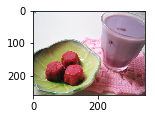

[('氷', 0.8233248591423035), ('カシス', 0.8212541937828064), ('カシスリキュール', 0.7052940726280212)]


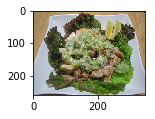

[('肉', 0.7509143352508545), ('胸肉', 0.732323169708252), ('むね肉', 0.6638086438179016)]


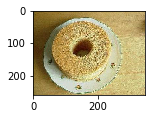

[('いちご', 0.8142042756080627), ('シフォンケーキ', 0.8127817511558533), ('苺', 0.7751946449279785)]


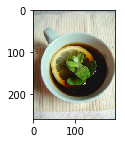

[('黒蜜', 0.9998950362205505), ('きな粉', 0.7142897248268127), ('きなこ', 0.6858043074607849)]


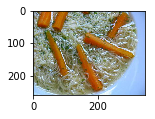

[('チキンスープ', 0.9998435974121094), ('チキンスープの素', 0.8342480659484863), ('ラスープ', 0.7464831471443176)]


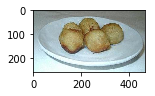

[('サツマイモ', 0.6674290299415588), ('包み', 0.6649551391601562), ('チーズ', 0.6590569019317627)]


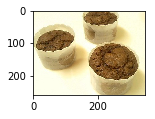

[('おから', 0.8383851647377014), ('ココアマフィン', 0.8370879292488098), ('バナナマフィン', 0.7600153088569641)]


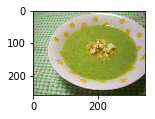

[('じゃがいも', 0.7678894996643066), ('ズッキーニ', 0.7519130706787109), ('ジャガイモ', 0.7327132821083069)]


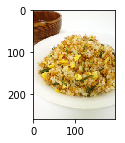

[('チャーハン', 0.8429300785064697), ('チキンラーメン', 0.8417119979858398), ('焼きラーメン', 0.7589492201805115)]


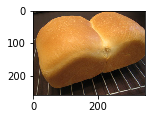

[('ｸﾘｰﾑ', 0.999890148639679), ('ｸﾘｰﾑ・', 0.9255657196044922), ('ｻﾜｰｸﾘｰﾑ', 0.8821676969528198)]


In [7]:
for i in range(10):
    a = np.random.randint(len(path_imgs))
    
    path_img = path_imgs[a]
    
    key = path_img.split('/')[-1][:-4]
    
    if key in title_V:
        img = plt.imread(path_img)
        plt.figure(figsize=(2,2))
        plt.imshow(img)
        plt.show()
        
        v = title_V[key]
        [[v]] = decoder([v.reshape(1,-1)])
        print(fastText.most_similar(positive=[v], topn=3))

In [8]:
from keras import optimizers
from keras.applications.resnet50 import ResNet50
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Activation, Input, Lambda
from keras.layers.normalization import BatchNormalization
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random
import keras

from keras import backend as K

%matplotlib inline
import cv2

# num_classes = 101
dim = 256

class ImageDataGenerator(object):
    def __init__(self, path_imgs, title_V):
        
        dim = 256
        self.path_imgs = path_imgs
        self.title_V = title_V
        
        self.reset()
        
    def reset(self):
        self.X = []
        self.Y = []

    def flow_from_directory(self, batch_size=25):
        while True:
            random.shuffle(self.path_imgs)
            
            for path_img in self.path_imgs:
                key = path_img.split('/')[-1][:-4]
                if key not in self.title_V:
                    continue
                
                try: # 画像が空だった時とか
                    x = cv2.imread(path_img)
                    x = cv2.resize(x, (224, 224))
                    self.X.append(x)
                    y = title_V[key]
                    
                    self.Y.append(y)
                    if len(self.X) == batch_size:
                        _X = np.array(self.X)
                        _Y = np.array(self.Y)
                        
                        self.reset()
                        yield _X, _Y
                        
                except:
                    continue



input_tensor = Input(shape=(224, 224, 3))

resnet = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor) # None => "imagenet"

x = resnet.output
x = Flatten(input_shape=resnet.output_shape[1:], name='flatten')(x)
x = Dense(1024, activation='tanh', name='features')(x) ######あり
outputs = Dense(dim, activation='tanh', name='outputs')(x)
model = Model(inputs=resnet.input, outputs=outputs)

for layer in model.layers[:-2]: # default 179
    print(layer)
    if 'BatchNormalization' in str(layer):
        pass
    else:
        layer.trainable = False
    model.compile(loss='binary_crossentropy', optimizer='adam')

model.compile(loss='cosine_proximity',
              optimizer=optimizers.Adam(lr=1e-5)) # 3

# model.load_weights('../food-101/weights/weights_cookpad_V_autoencoder_5.01_-0.2181.hdf5') ####################

model.summary()

fpath = '../food-101/weights/weights_cookpad_V_autoencoder_5.{epoch:02d}_{loss:.4f}.hdf5' ################
cp_cb = keras.callbacks.ModelCheckpoint(
    filepath = fpath,
    monitor="loss",
    verbose=1,
    save_best_only=False,
    save_weights_only=True,
    mode='auto',
    period=1)


train_datagen = ImageDataGenerator(path_imgs=path_imgs, title_V=title_V)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

__________________________________________________________________________________________________
activation_39 (Activation)      (None, 14, 14, 256)  0           bn4f_branch2b[0][0]              
__________________________________________________________________________________________________
res4f_branch2c (Conv2D)         (None, 14, 14, 1024) 263168      activation_39[0][0]              
__________________________________________________________________________________________________
bn4f_branch2c (BatchNormalizati (None, 14, 14, 1024) 4096        res4f_branch2c[0][0]             
__________________________________________________________________________________________________
add_13 (Add)                    (None, 14, 14, 1024) 0           bn4f_branch2c[0][0]              
                                                                 activation_37[0][0]              
__________________________________________________________________________________________________
activation

In [52]:
model.load_weights('../food-101/weights/weights_cookpad_V_autoencoder_5.03_-0.2769.hdf5')
# model.load_weights('../food-101/weights/weights_cookpad_V_autoencoder_5.01_-0.2181.hdf5')

# ↑1024の層を入れるのがポイント

# BN層を固定しないのがポイント

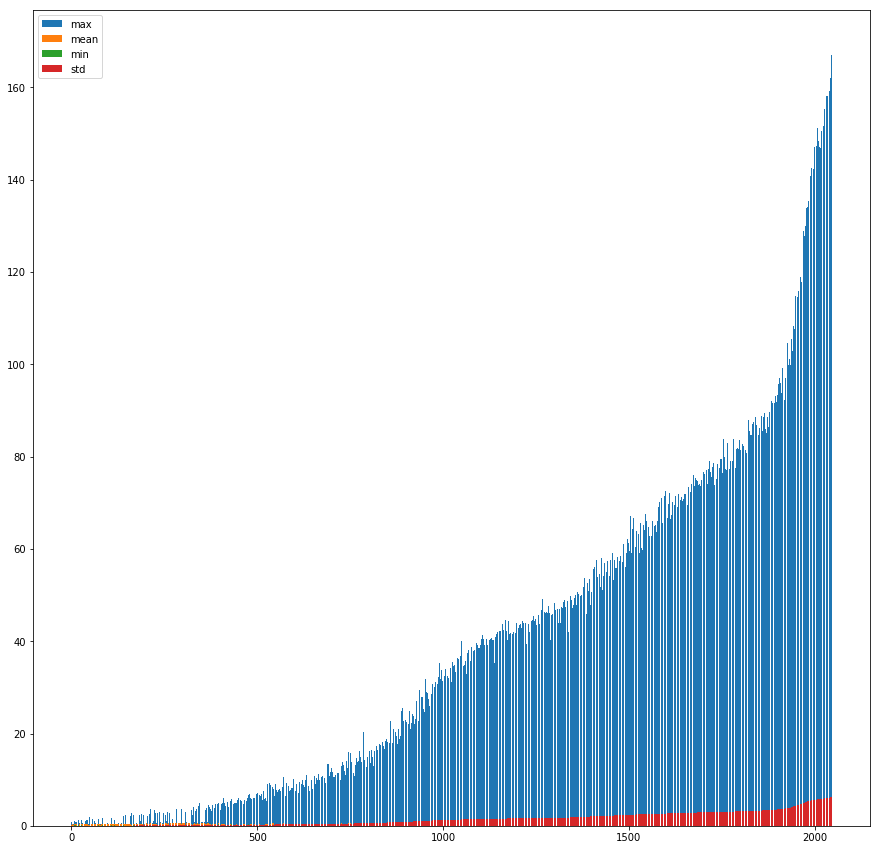

In [10]:
features_model = Model(inputs=model.input, outputs=model.get_layer('features').output)

In [12]:
hist = model.fit_generator(
    generator=train_datagen.flow_from_directory(),
    steps_per_epoch= 200000 / 25, # 50 だとwarning出た
    epochs=3,
    verbose=1,
    callbacks=[cp_cb])

Epoch 1/3
8000/8000 [==============================] - 3571s 446ms/step - loss: -0.2554

Epoch 00001: saving model to ../food-101/weights/weights_cookpad_V_autoencoder_5.01_-0.2554.hdf5
Epoch 2/3
8000/8000 [==============================] - 3091s 386ms/step - loss: -0.2684

Epoch 00002: saving model to ../food-101/weights/weights_cookpad_V_autoencoder_5.02_-0.2684.hdf5
Epoch 3/3
8000/8000 [==============================] - 3090s 386ms/step - loss: -0.2769

Epoch 00003: saving model to ../food-101/weights/weights_cookpad_V_autoencoder_5.03_-0.2769.hdf5


Exception ignored in: <generator object ImageDataGenerator.flow_from_directory at 0x7f79284b1f10>
RuntimeError: generator ignored GeneratorExit


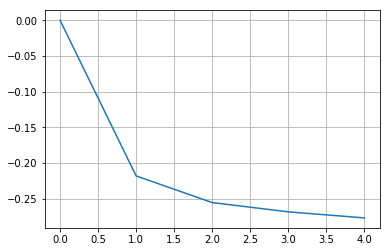

In [3]:
hist1 = [0, -0.2181, -0.2554, -0.2684, -0.2769]
plt.plot(np.arange(0,5,dtype=np.uint8),hist1)
plt.grid(which='major')
plt.grid(which='minor')
plt.show()

# ここから類似画像を探していく

In [11]:
# 検索用

path = "../food-life-management/"

path_title = os.listdir(path + 'recipe_title_filt/')
path_title = ['recipe_title_filt/' + p for p in path_title]
path_title.sort()
path_title = path_title[:10] ############################### ここ

path_title = [path + p for p in path_title]

title = {}

for path_t in path_title:
    with open(path_t, 'rb') as f:
        t = pickle.load(f)
    title.update(t)

n=0
for key, v in title.items():
    n+=1
    print(key)
    print(v)
    #print(fastText.most_similar(positive=[v], topn=3))
    if n>2:break

print(len(title.items()))

menu-0000000-0010000-0000000
['フルーツ', 'ジャム']
menu-0000000-0010000-0000001
['豚の角煮']
menu-0000000-0010000-0000002
['やの', 'おはぎ']
292579


In [35]:
# 検索用。特徴量ベクトルの辞書

# 10個ずつくらいで計算する
F = {} # features
X = [] # images
P = [] # path_imgs

n=0
for path_img in path_imgs:
    n+=1
    try: # 画像が空だった時とか
        x = cv2.imread(path_img)
        x = cv2.resize(x, (224, 224))
        X.append(x)
        P.append(path_img)
    except:
        continue
    if len(X) == 100:
        Y = features_model.predict(np.array(X)).reshape(-1,1024)
        print(n, end=" ")
        _F = dict(zip(P, Y))
        F.update(_F)
        X = []
        P = []
        
    if len(F) == 10000:
        break

print("done")
list(F.values())[0].shape

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 done


(1024,)

In [36]:
with open("F2.pkl", 'wb') as f:
    pickle.dump(F, f)

In [50]:
with open("F.pkl", 'rb') as f:
    F = pickle.load(f)

In [38]:
FF = np.array(list(F.values()))
FF.shape

(10000, 1024)

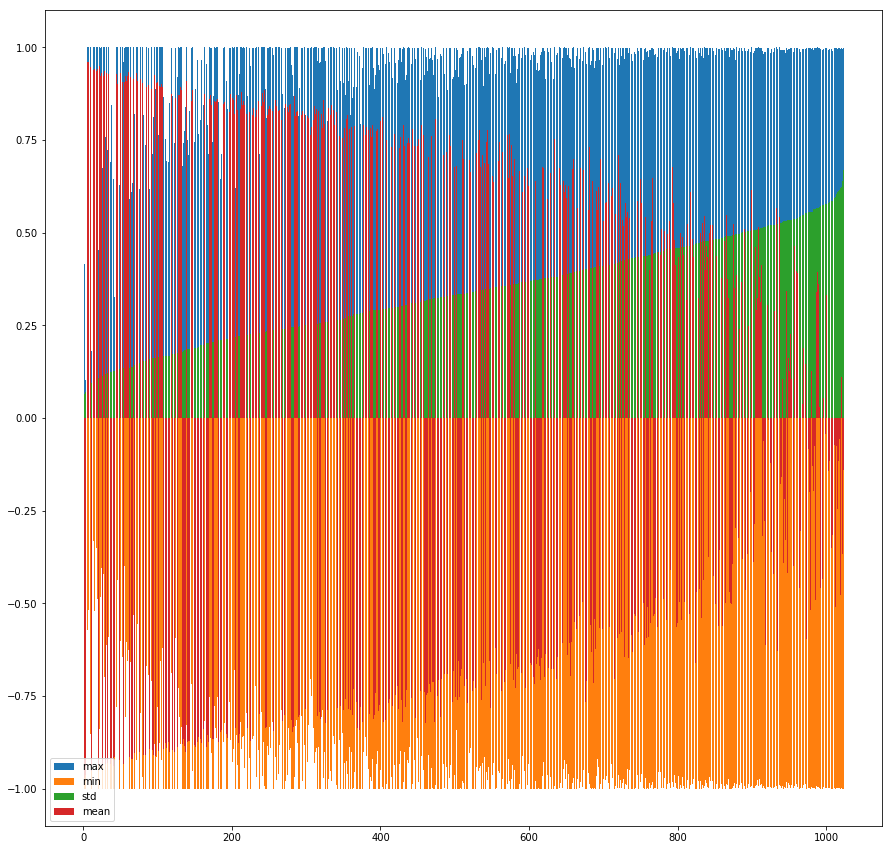

In [15]:
plt.figure(figsize=(15,15))



FF_mean = np.mean(FF, axis=0)
FF_std = np.std(FF, axis=0)
FF_max = np.max(FF, axis=0)
FF_min = np.min(FF, axis=0)

indecise = np.argsort(FF_std)

plt.bar(np.arange(0,1024), FF_max[indecise], label="max", linewidth=3)
plt.bar(np.arange(0,1024), FF_min[indecise], label="min", linewidth=3)
plt.bar(np.arange(0,1024), FF_std[indecise], label="std", linewidth=3)

plt.bar(np.arange(0,1024), FF_mean[indecise], label="mean", linewidth=3)

plt.legend()
plt.show()

## 似た画像を取ってくるゼ☆
#### 特徴量の類似度を取るのと、256の類似度をとるののどっちがいいの?

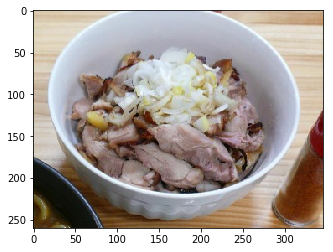

(1024,)


In [58]:
import cv2
path_sample_img = "../darkflow/hoge1.jpg"

img = plt.imread(path_sample_img)
plt.imshow(img)
plt.show()

x = cv2.imread(path_sample_img)
x = cv2.resize(x, (224, 224))
y = features_model.predict(x.reshape(1,224,224,3)).reshape(1024)
# y = model.predict(x.reshape(1,224,224,3)).reshape(256)
print(y.shape)



min:  [-0.929902   -0.94260824  0.46746376 -0.816408   -0.8294833  -0.5672063
 -0.832746    0.9913429  -0.8847187  -0.9971728 ]
0.013035472



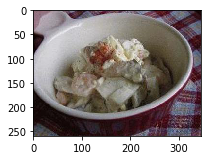

0.93540365


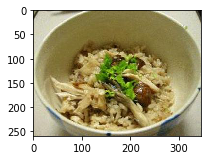

0.9336415


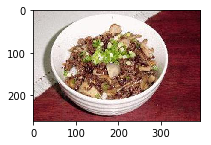

0.9313511


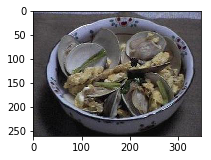

0.9297912


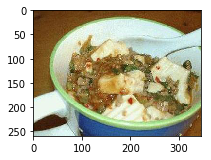

0.9296627


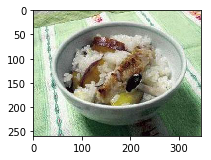

0.92906016


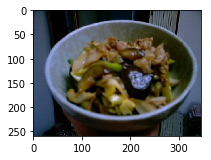

0.9288028


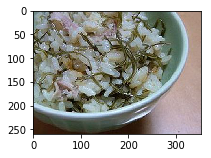

0.92801726


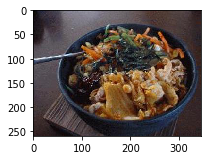

0.9262295


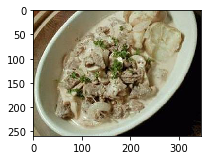

0.92572683


[('炊き込みご飯', 2),
 ('小海老', 1),
 ('エリンギ', 1),
 ('大根', 1),
 ('タルタルソース', 1),
 ('サラダ', 1),
 ('栗ご飯', 1),
 ('まいたけ', 1),
 ('牛挽肉', 1),
 ('丼', 1)]

In [59]:
sim_list = []

# yy = np.abs(np.array(sorted(y)))
print("min: ", y[:10])
print(y.mean())
# print("max: ", yy[-10:])
print()
import matplotlib.pyplot as plt
path_best_img = ""
best = 0
def cos_sim(v1, v2):
#     print(v1.shape, v2.shape)
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)) # * じゃなくて+になってたんだけど
n=0

rank = {}

for path_img, v in F.items():
    v = v.reshape(1024)
    score = cos_sim(y, v)
    
    rank.update({path_img:score})
    
rank = sorted(rank.items(), key=lambda x: x[1])[-10:][::-1]
# print(rank)
for item in rank:
    
    path_img = item[0]
    score = item[1]
    img = plt.imread(path_img)
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()
    
    print(score)
    
    sim_list.append(path_img)
    
sim_list = np.array(sim_list)
A = []
for p in sim_list:
    try:
        A.extend(title[p[29:-4]])
    except:
        print(p[29:-4])
from collections import Counter

counter = Counter(A)
counter.most_common(10)

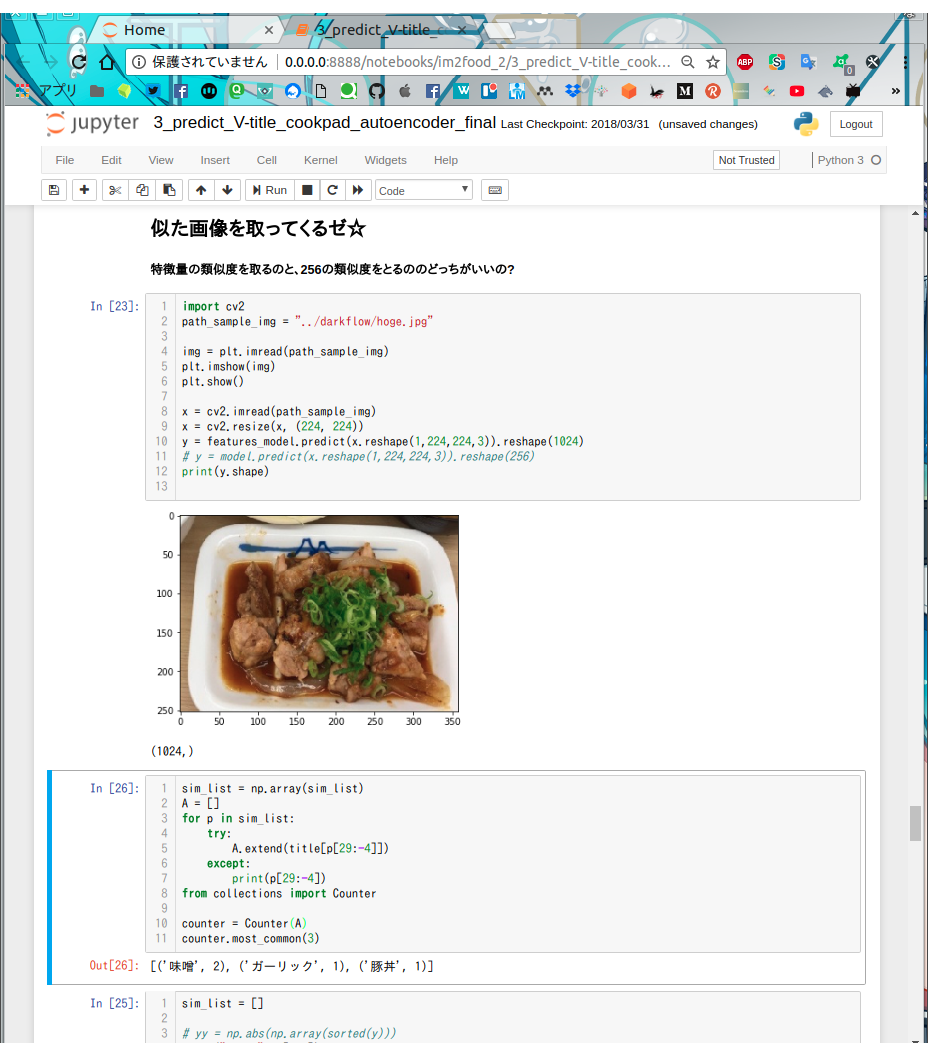

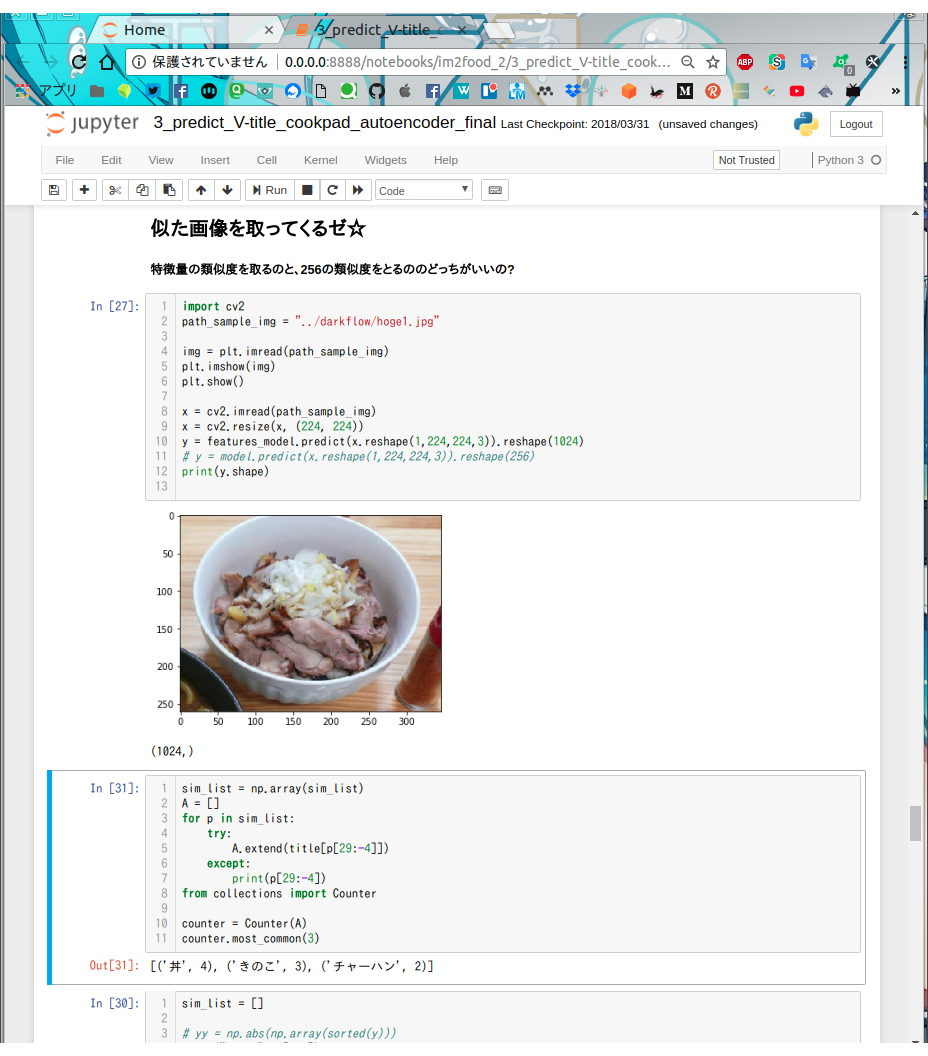

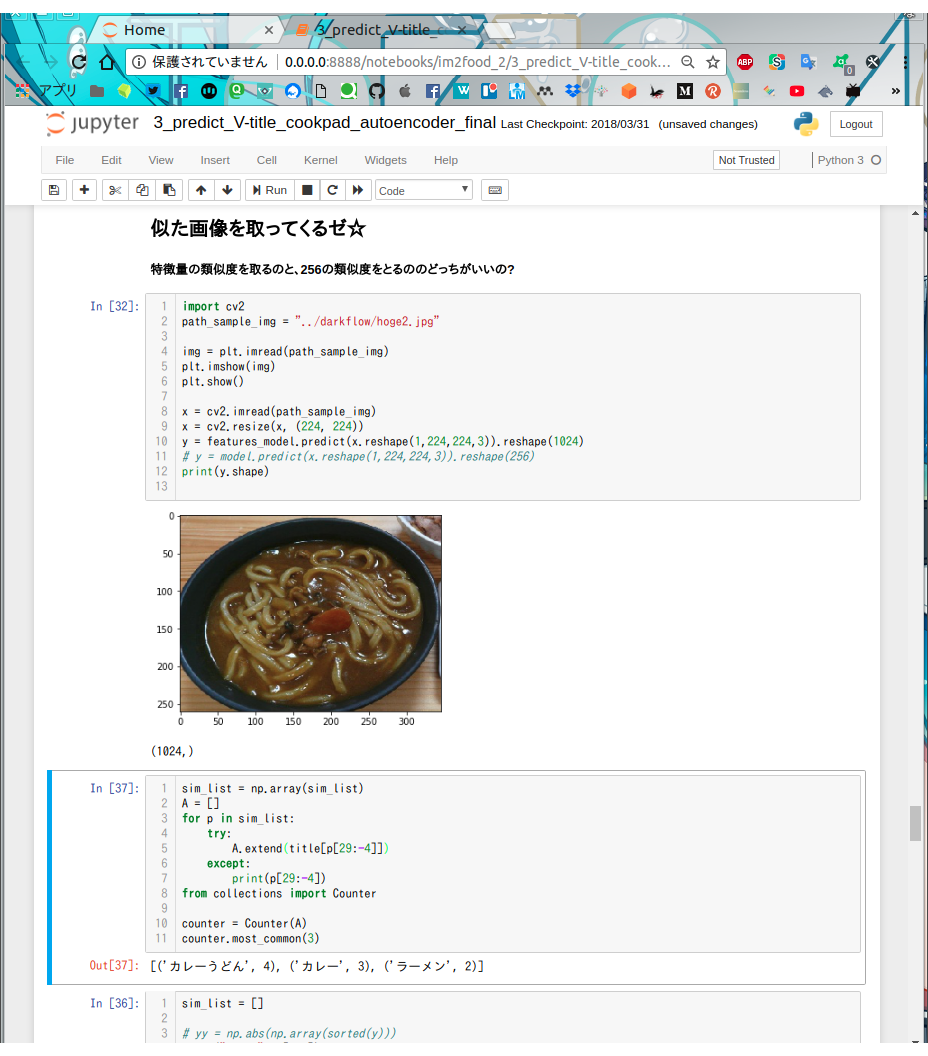

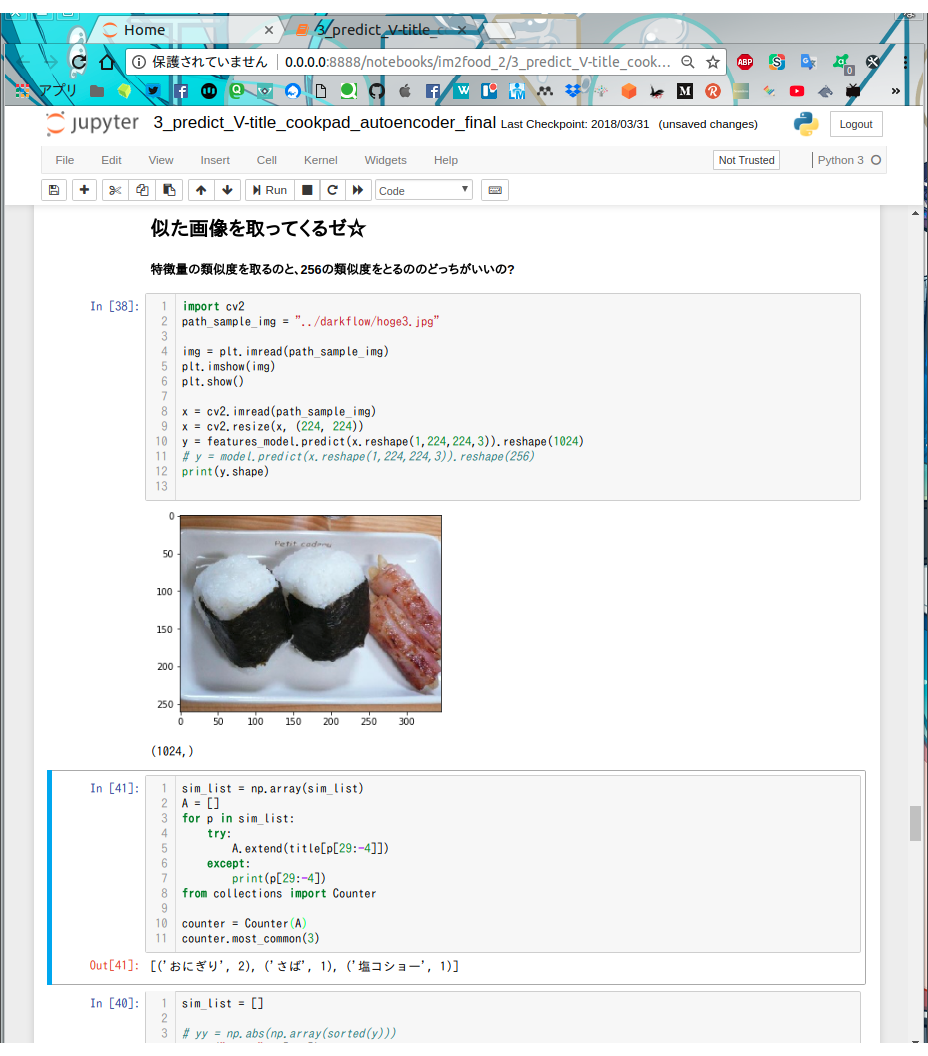

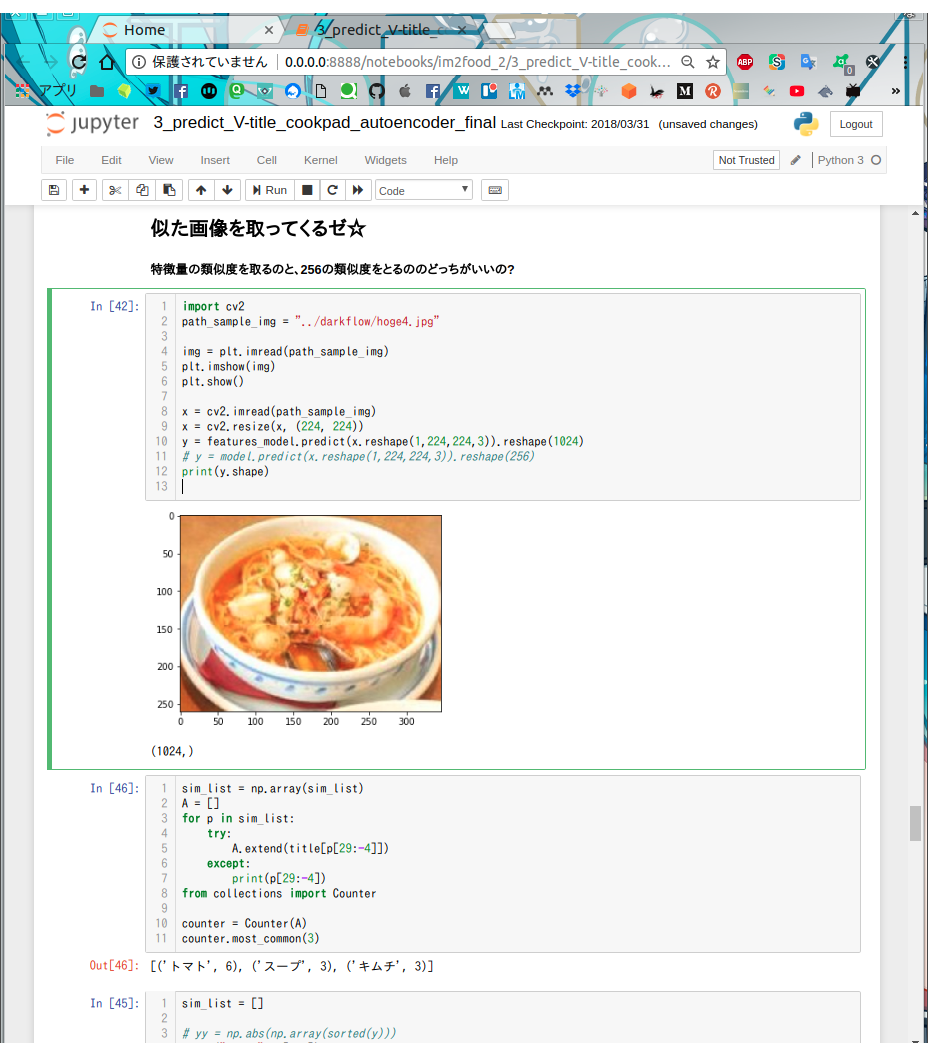

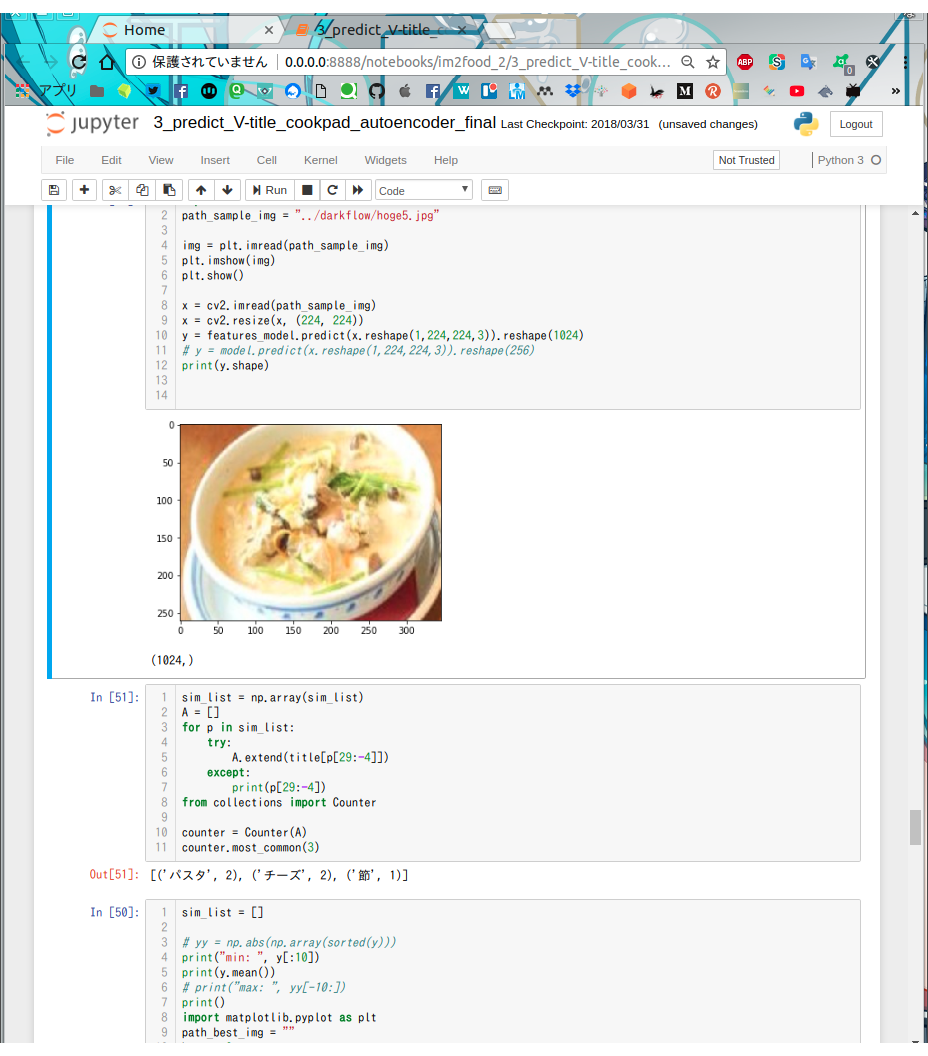